## Overview

The key to this project is to categorize confidence level of a writing sample and then use that information to compare the confidence in writing of men to women. 

Hypothesis: women and men writing samples have a differing level of confidence

Your work should document findings for peers and technical stakeholders, including:

-Executive Summary

-Identification of outliers

-Description of how you defined your variables

-Discussion of model selection and implementation

-Description of any data pipeline(s)

-Visualizations & statistical analysis

-Interpretation of findings & relation to goals/success metrics

-Description of any source code used to conduct analysis

-Stakeholder recommendations & next steps for model/peers

##  Import Relevant Packages

In [63]:
import pandas as pd
import requests 
import json
import html5lib

# Step 1: Request data from URL
# Step 2: use json to return data in dictionary structure


In [64]:
from bs4 import BeautifulSoup
import lxml.html as LH

In [65]:
import seaborn as sns

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
import pickle

In [68]:
%matplotlib inline

In [116]:
import nltk
from nltk.corpus import brown

from cPickle import dump, load
import sys
import os
from itertools import dropwhile

In [203]:
import sexmachine.detector as gender

In [212]:
import gender_guesser.detector as gender

In [331]:
import matplotlib.pyplot as plt


In [369]:
#requires a lot of package downloads (can use as a backup for 'sexmachine')
#from genderizer.genderizer import Genderizer

## Import Data

Previously done and pickled 

### Initially tried other ways to import

In [ ]:
# myfile = open('/Users/samanthafalk/GA-DSI/projects-capstone/sorted_data/apparel/all.review', 'r')
# data=myfile.read().replace('\n', '')
# table = LH.fromstring(data)
# dataf = [[uid.text_content() for uid in review.xpath('unique_id')]
#           for review in table.xpath('review')]
# df = pd.DataFrame(dataf)

### Utilized the following code to import data

In [3]:
# def read_file(filename):
#     myfile = open('/Users/samanthafalk/GA-DSI/projects-capstone/sorted_data/'+ filename +'/all.review', 'r')
#     data=myfile.read().replace('\n', '')
#     table = LH.fromstring(data)
    
#     datadf = [[[uid.text_content() for uid in review.xpath('unique_id')][0], 
               
#            [name.text_content() for name in review.xpath('reviewer')][0],
               
#            [location.text_content() for location in review.xpath('reviewer_location')][0],
               
#            [date.text_content() for date in review.xpath('date')][0],
               
#            [product.text_content() for product in review.xpath('product_name')][0],
               
#            [helpful.text_content() for helpful in review.xpath('helpful')][0],
               
#            [title.text_content() for title in review.xpath('title')][0],
               
#            [reviewtext.text_content() for reviewtext in review.xpath('review_text')][0]]
              
#            for review in table.xpath('review')]
    
#     df = pd.DataFrame(datadf, columns=['unique_id', 'reviewer','reviewer_location', 'date', 'product_name', 'helpful', 'title', 'review_text'  ])
#     return df

In [ ]:
#TESTING FUNCTION
# appareldf=read_file('apparel')
# appareldf['type']='apparel'
# appareldf

## Utilizes function above to iterate through files and add to master dataframe

In [4]:
def combinedataframes(lstoffiles):
    for i in range(len(lstoffiles)):
        print lstoffiles[i]
        if i==0:
            dfmaster=read_file(lstoffiles[i])
            dfmaster['type']=lstoffiles[i]
        else:
            df=read_file(lstoffiles[i])
            df['type']=lstoffiles[i]
            dfmaster= pd.concat([dfmaster, df])

    dfmaster.reset_index(inplace=True, drop=True)
    return dfmaster

In [11]:
#list of files
filenamelst=['apparel', 'automotive', 'baby', 'beauty','camera_&_photo', 
             'cell_phones_&_service', 'computer_&_video_games', 'kitchen_&_housewares', 'sports_&_outdoors', 'magazines',
             'electronics', 'music', 'gourmet_food', 'musical_instruments', 'tools_&_hardware', 'grocery',
             'office_products', 'toys_&_games', 'health_&_personal_care', 'outdoor_living',
             'jewelry_&_watches', 'software']

other= ['DVD', 'video']

#removed books (almost 1 million), DVD, and videos

In [6]:
#create master dataframe
masterdf=combinedataframes(filenamelst)

apparel
automotive
baby
beauty
camera_&_photo
cell_phones_&_service
computer_&_video_games
kitchen_&_housewares
sports_&_outdoors
magazines
electronics
music
gourmet_food
musical_instruments
tools_&_hardware
grocery
office_products
toys_&_games
health_&_personal_care
outdoor_living
jewelry_&_watches
software


In [12]:
#add in video reviews
videoreviews=combinedataframes(other)

DVD
video


In [14]:
#add two dataframes together
masterdf= pd.concat([masterdf, videoreviews])
masterdf.reset_index(inplace=True, drop=True)

In [13]:
#pickle df
masterdf.to_pickle('dataframePickle')

In [6]:
#read in pickle
masterdf = pd.read_pickle('dataframePickle')

In [7]:
masterdf.tail()

,unique_id,reviewer,reviewer_location,date,product_name,helpful,title,review_text,type
447331,"6300269450:best_surf_movie:david_adams_""i_left...","David Adams ""I left my wallet in...""","...Detroit, MI","January 13, 2005","Big Wednesday: Video: Jan-Michael Vincent,Gary...",5 of 5,Best Surf Movie,I'm sure I'll get some flack for declaring thi...,video
447332,6300269450:yes:,,,"June 14, 2004","Big Wednesday: Video: Jan-Michael Vincent,Gary...",3 of 3,Yes,"If you're interested in surfing at all, you ne...",video
447333,"B000IAUJYE:my_favorite_episode:j._donaldson_""c...","J. Donaldson ""Cal-diver""","Thousand Oaks, CA USA","March 19, 2007","Conspiracy Theory: Unbox Video: Mark Harmon,Sa...",1 of 1,My Favorite Episode,"I don't have television, haven't for 11 years....",video
447334,"B000IAUJYE:great_episode:alena_kinser_""leeners""","Alena Kinser ""Leeners""","Des Moines, WA","December 3, 2006","Conspiracy Theory: Unbox Video: Mark Harmon,Sa...",1 of 3,Great Episode,This is the first episode where we really see ...,video
447335,"B000IAUJYE:not_happy:katie_j._johnson_""katie""","Katie J. Johnson ""Katie""","Townsville, Australia","September 28, 2006","Conspiracy Theory: Unbox Video: Mark Harmon,Sa...",3 of 7,Not Happy,"I'm a fan of NCIS, but living in australia mea...",video


In [9]:
masterdf['type'].value_counts()

music                     174180
DVD                       124438
video                      36180
electronics                23009
kitchen_&_housewares       19856
toys_&_games               13147
apparel                     9252
camera_&_photo              7408
health_&_personal_care      7225
sports_&_outdoors           5728
baby                        4256
magazines                   4191
beauty                      2884
computer_&_video_games      2771
grocery                     2632
software                    2390
jewelry_&_watches           1981
outdoor_living              1599
gourmet_food                1575
cell_phones_&_service       1023
automotive                   736
office_products              431
musical_instruments          332
tools_&_hardware             112
Name: type, dtype: int64

In [10]:
#add word count
masterdf['word_count']=[len(x.split(' ')) for x in masterdf['review_text']]

In [32]:
#find middle 50 percent
masterdf['word_count'].describe(percentiles=[.35, .5, .85])

count    447336.000000
mean        138.420547
std         157.359194
min           1.000000
35%          61.000000
50%          88.000000
85%         241.000000
max        4516.000000
Name: word_count, dtype: float64

In [12]:
#look at details of dataframe
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447336 entries, 0 to 447335
Data columns (total 10 columns):
unique_id            447336 non-null object
reviewer             447336 non-null object
reviewer_location    447336 non-null object
date                 447336 non-null object
product_name         447336 non-null object
helpful              447336 non-null object
title                447336 non-null object
review_text          447336 non-null object
type                 447336 non-null object
word_count           447336 non-null int64
dtypes: int64(1), object(9)
memory usage: 34.1+ MB


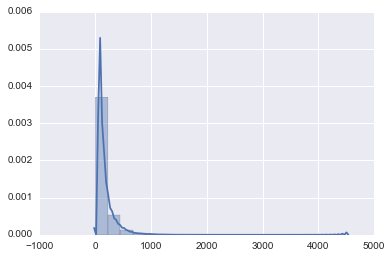

In [17]:
#look at ditribution of word count
#remove outliers and also reviews that have too small of paragraphs
sns.distplot(masterdf[['word_count']], bins=20)

In [33]:
mid50df=masterdf.loc[masterdf['word_count']>=61]

In [34]:
mid50df=mid50df.loc[mid50df['word_count']<=241]

In [35]:
mid50df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226060 entries, 0 to 447333
Data columns (total 10 columns):
unique_id            226060 non-null object
reviewer             226060 non-null object
reviewer_location    226060 non-null object
date                 226060 non-null object
product_name         226060 non-null object
helpful              226060 non-null object
title                226060 non-null object
review_text          226060 non-null object
type                 226060 non-null object
word_count           226060 non-null int64
dtypes: int64(1), object(9)
memory usage: 19.0+ MB


In [36]:
#sort by word count
mid50df.sort(columns='word_count', inplace=True)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [37]:
# reset index
mid50df.reset_index(drop=True, inplace=True)

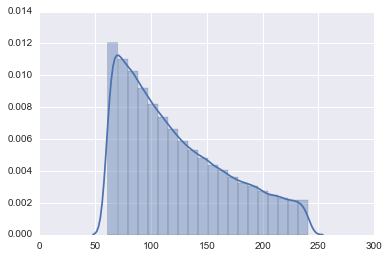

In [38]:
#visualize distribution again
sns.distplot(mid50df[['word_count']], bins=20)

In [63]:
mid50df.head()

,unique_id,reviewer,reviewer_location,date,product_name,helpful,title,review_text,type,word_count
0,B00004YRQ9:ps2_controller:jack,Jack,,"April 22, 2006",Sony Playstation 2 Black Dualshock Controller:...,2 of 2,PS2 controller,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61
1,B00004U9PO:soft-core_fun!:,,,"December 30, 2000",Ultimate Attraction (Rated): Video: Gabriella ...,24 of 31,Soft-Core fun!,"The plot behind this film is silly, Gabriella ...",video,61
2,B000H7JDVI:have_a_listen_to_elton_john's_the_c...,B. Schram,"Mpls,Mn","November 15, 2006",The Captain and the Kid: Music: Elton John,,Have a listen to Elton John's The Captain and ...,Being a fan of the great EJ and fully enjoying...,music,61
3,"B000001AH0:timeless_teena:k._blunt_""kblunt1""","K. Blunt ""kblunt1""","LA, CA United States","May 17, 2005",Irons in the Fire: Music: Teena Marie,2 of 2,Timeless Teena,This has to be my favorite Teena Marie album. ...,music,61
4,B00000EFZK:discover_what_the_radio_program_man...,R. Hogan,,"January 30, 2006",The Chess Box: Music: Bo Diddley,1 of 2,Discover what the radio program manager kept f...,I listened to both CD's twice in one weekend. ...,music,61


In [51]:
#pickle middle 50 percent dataframe
mid50df.to_pickle('mid50percentdata')

In [117]:
#check that the wordcount is accurate
print mid50df['word_count'][7]
print mid50df['review_text'][7]

61
I thought this was actually pretty good. The chocolate pieces added just enough chocolate taste to enjoy. I did not have any issues with 'waxy' taste. This is not baking choclate that melts in your hand so don't expect it to be. It has to hold up in the milk as well as on the shelf. I will definitely purchase again.


In [118]:
mid50df.sort(columns='word_count').tail()

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,unique_id,reviewer,reviewer_location,date,product_name,helpful,title,review_text,type,word_count
225772,B0006FYORY:vibrant_&_exotic:moongoddess,MoonGoddess,"Ontario, CA USA","August 24, 2005",Illuminate: Music: Qntal,11 of 16,Vibrant & Exotic,"Qntal, unfamiliar to me at the time, started s...",music,241
225771,B000HC2LEY:outstanding_and_unforgettable_film!...,Ernest Jagger,"Culver City, California","October 18, 2006",Reservoir Dogs (15th Anniversary Edition): DVD...,8 of 8,Outstanding And Unforgettable Film!,"I liked this film when I first viewed it, [it ...",DVD,241
225770,"B000E97H8K:the_lady_can_sing.:music_judge_""tho...","Music Judge ""Thomas""",Illinois,"August 13, 2006",A Little Girl... A Big Four-Lane: Music: Aleci...,7 of 7,The Lady Can Sing.,I had never heard of Alecia Nugent until I cam...,music,241
225768,B00006FIAX:a_lesson_in_how_experimentation_can...,Metalhead,"Indianapolis, IN United States","August 18, 2005",Damage Done: Music: Dark Tranquillity,4 of 4,A lesson in how experimentation can work,There have been a lot of metal bands recently ...,music,241
226059,"B0000CFXNS:a_masterpiece_enhanced:joburgpete_""...","Joburgpete ""irridium""",Johannesburg,"January 8, 2006",Revenge: Music: Eurythmics,8 of 9,A masterpiece enhanced,After great synth albums like Sweet Dreams and...,music,241


## Random sample for mechanical turk exercise 

In [147]:
mid50dfsample= mid50df.sample(frac=.0055, random_state=666)

In [148]:
mid50dfsample.reset_index(inplace=True, drop=True)

In [149]:
mid50dfsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 10 columns):
unique_id            1243 non-null object
reviewer             1243 non-null object
reviewer_location    1243 non-null object
date                 1243 non-null object
product_name         1243 non-null object
helpful              1243 non-null object
title                1243 non-null object
review_text          1243 non-null object
type                 1243 non-null object
word_count           1243 non-null int64
dtypes: int64(1), object(9)
memory usage: 97.2+ KB


In [154]:
train, test = train_test_split(mid50df, test_size = 0.0055)

In [183]:
mechturkreviews=test[['review_text']]

In [184]:
mechturkreviews.reset_index(inplace=True, drop=True)

In [198]:
test= mechturkreviews['review_text'][4]

In [199]:
test

'This album is a winner. She`s great looking that`s for sure, but when listen trough  when youre heart are in pain, and youre soul are swinging from up and downs, this album gives you medicine.  With Jerry Douglas on Dobro, how can you miss the focus on great music. The voice, mmmm the voice, has a certain signature to it . It could be sometimes to softspoken to lift it up to a 5 star. But you certainly will put it many times on your record player, and you can cancell your therapist, that day. To say it with Allison Kraus: (Track 11):Dreaming My Dreams with you: It makes you to a walking lullabay the rest of the day. It`s an earbalsam song that will knock you over'

In [170]:
#mechturkreviews['review_text']= [x.replace('`', "'") for x in mechturkreviews['review_text']]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [187]:
mechturkreviews['review_text']= [x.encode('utf-8') for x in mechturkreviews['review_text']]
#not sure if this worked since the below works now? 

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [196]:
mechturkreviews.to_csv('mechturksample.csv')

## Build list of key words and phrases

Something to think about in the future: how to stop from using names of books, movies, etc. 

In [2]:
Gmailplugin = [{ 'keyword': 'just',
      'source':  'http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/',
      'message': '"Just" demeans what you have to say. "Just" shrinks your power. ' 
               'It\'s time to say goodbye to the justs. --Tara Sophia Mohr', },
    { 'keyword': 'actually',
      'source':  'http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/',
      'message': '"Actually" communicates a sense of surprise that you have ' 
               'something to say. Of course you want to add something. Of ' 
               'course you have questions. There\'s nothing surprising about ' 
               'it.  --Tara Sophia Mohr', },
    { 'keyword': 'sorry',
      'source':  'http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything',
      'message': 'Using "sorry" frequently undermines your gravitas and makes you ' 
               'appear unfit for leadership. --Sylvia Ann Hewlett', },
    { 'keyword': 'apologize|apologies|forgive',
      'source':  'http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything',
      'message': 'Apologizing unnecessarily puts you in a subservient position and ' 
               'makes people lose respect for you --Bonnie Marcus', },
    { 'keyword': 'I think|We think',
      'source':  'http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails',
      'message': '"I think" undermines your idea and displays an overall lack of ' 
               'self-confidence. --Lydia Dishman', },
    { 'keyword': 'I\'m no expert|We\'re no expert',
      'source':  'http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails',
      'message': '"I\'m no expert" undermines your idea and displays an overall ' 
              'lack of self-confidence. --Lydia Dishman', },
    { 'keyword': 'Yes, but',
      'source':  'http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf',
      'message': 'The "Yes, but" syndrome is entirely counterproductive, particularly in a work setting. ' 
               'You will become an integral part of any team if you are willing ' 
               'to build ideas rather than discard them. --Victoria Simon, Ph.D. and Holly Pedersen, Ph.D.', },
    { 'keyword': 'literally',
      'source':  'https://expresswriters.com/50-weak-words-and-phrases-to-cut-out-of-your-blogging/',
      'message': 'If something is literal, your readers should know it without you needing to use this word to clarify it. ' 
               'More often than not, the word "literally" makes writing sound flabby and juvenile, ' 
               'which is probably not what you\'re going for. --Julia McCoy', },
    { 'keyword': 'very',
      'source':  'http://blog.crew.co/5-weak-words-to-avoid/',
      'message': 'The word \'very\' does not communicate enough information. Find a stronger, more meaningful adverb, or omit it completely. --Andrea Ayres', },
    { 'keyword': 'kind of|sort of',
      'source':  'http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf',
      'message': 'This qualifier weakens the message as well as the authority of the writer. --Victoria Simon, Ph.D. and Holly Pedersen, Ph.D.',
    },
    { 'keyword': 'does that make sense',
      'source':  'http://goop.com/how-women-undermine-themselves-with-words/',
      'message': '"does that make sense" comes across either as condescending ' 
               '(like your audience can\'t understand) or it implies you feel ' 
               'you\'ve been incoherent. A better way to close is something like ' 
               '"I look forward to hearing your thoughts." You can leave it up ' 
               'to the other party to let you know if they are confused about ' 
               'something, rather than implying that you "didn\'t make sense." ' 
               '--Tara Sophia Mohr', },
    { 'keyword': 'try|trying',
      'source':  'http://www.lifehack.org/articles/communication/7-things-not-to-say-and-7-things-to-start-saying.html',
      'message': '"Do or do not. There is no try." --Yoda' },
    { 'keyword': 'I should',
      'source':  'http://www.lifehack.org/articles/communication/7-things-not-to-say-and-7-things-to-start-saying.html',
      'message': 'The word "should" is inherently negative. "Should" implies a lose: lose ' 
               'situation and it\'s just not conducive to positive outcomes in life. ' 
               'It\'s a form of criticism, and it\'s best left out of your everyday language. ' 
               'Instead of beating yourself up for what you should have done, ' 
               'focus on what you have the power to change. ' 
               '-- Zoe B', },
    { 'keyword': 'I feel',
      'source':  'http://www.freelancewriting.com/articles/ten-words-to-avoid-when-writing.php',
      'message': 'If you write an opinion, the reader understands that you also ' 
               'believe it is right. ' 
               '--David Bowman', },
    { 'keyword': 'I believe',
      'source':  'https://hbr.org/2011/12/replace-meaningless-words-with',
      'message': 'Phrases containing "we believe," "we think," and "we feel" pervade ' 
               'presentation narratives to such a degree that they spill over into ' 
               'sentences where caution is unnecessary. ' 
               '--Jerry Weissman', },
    { 'keyword': 'I\'m just saying',
      'source':  'http://101books.net/2012/03/02/7-annoying-words-that-should-die-a-horrible-death/',
      'message': 'I think what you\'re saying is that you said something. If ' 
               'you\'re using it to mitigate something that may be offensive or ' 
               'embarrassing, then don\'t say it. Say something else. Otherwise, ' 
               'say what you\'re saying without the "just saying." We already ' 
               'know you\'re saying it... after all, you just said it! ' 
               '--Robert Bruce', },
    { 'keyword': 'In my opinion',
      'source':  'https://preciseedit.wordpress.com/2009/06/19/in-my-opinion-i-think-that-i-believe-this-is-bad-writing/',
      'message': 'Phrases such as "in my opinion," "I think that," and "I believe" create three problems for writers: ' 
               '1. They delay the writer\'s message; ' 
               '2. They demonstrate insecurity; and ' 
               '3. They tell the reader what he already knows. Remove that phrase, or any similar phrase, ' 
               'and get to the point. --David Bowman', },
    { 'keyword': 'This might be a stupid question',
      'source':  'http://www.vogue.com/13362056/things-working-women-should-never-email/',
      'message': 'Like they said in school, there are no stupid ' 
               'questions. Well, sometimes there are--but ask, don\t caveat. --Alexandra Macon', },
    { 'keyword': 'I may be wrong|I might be wrong',
      'source':  'http://www.vogue.com/13362056/things-working-women-should-never-email/',
      'message': 'Don\'t lessen the impact of what you say before ' 
               'you say it. --Alexandra Macon'}]

In [3]:
lsttolookfor= ['sorry', 'maybe', 'perhaps', 'it seems', "i'm no expert", "it appears"]
for x in Gmailplugin:
    lsttolookfor.append(x['keyword'])

In [4]:
lsttolookfor

['sorry',
 'maybe',
 'perhaps',
 'it seems',
 "i'm no expert",
 'it appears',
 'just',
 'actually',
 'sorry',
 'apologize|apologies|forgive',
 'I think|We think',
 "I'm no expert|We're no expert",
 'Yes, but',
 'literally',
 'very',
 'kind of|sort of',
 'does that make sense',
 'try|trying',
 'I should',
 'I feel',
 'I believe',
 "I'm just saying",
 'In my opinion',
 'This might be a stupid question',
 'I may be wrong|I might be wrong']

In [31]:
list(set(lsttolookfor))

['just',
 'I think|We think',
 "i'm no expert",
 'I believe',
 'In my opinion',
 'perhaps',
 'literally',
 'actually',
 'I may be wrong|I might be wrong',
 'does that make sense',
 'Yes, but',
 'try|trying',
 "I'm just saying",
 'very',
 'I should',
 'it seems',
 'kind of|sort of',
 'it appears',
 'This might be a stupid question',
 'apologize|apologies|forgive',
 'sorry',
 'I feel',
 'maybe',
 "I'm no expert|We're no expert"]

In [5]:
alteredlsttolookfor= []
for x in lsttolookfor:
    alteredlsttolookfor.append(x.lower())

In [40]:
testingother.replace("'", "")

'im no expert'

In [18]:
alteredlsttolookfor.sort()

In [33]:
del alteredlsttolookfor[-12]

In [7]:
from nltk.stem import PorterStemmer

In [35]:
alteredlsttolookfor.append("possibly")

In [36]:
alteredlsttolookfor.append("could")
alteredlsttolookfor.append("might")
alteredlsttolookfor.append("may")
alteredlsttolookfor.append("seem")
alteredlsttolookfor.append("in my perspective")
alteredlsttolookfor.append("just my opinion")
alteredlsttolookfor.append("i dont know if")

In [20]:
stemmer = PorterStemmer()
print stemmer.stem('forgive')
print stemmer.stem('apologize')

forgiv
apolog


In [27]:
alteredlsttolookfor.remove("i think|we think")
alteredlsttolookfor.append("i think")
alteredlsttolookfor.append("we think")


In [25]:
alteredlsttolookfor.remove("try|trying")
alteredlsttolookfor.append("try")

In [23]:
alteredlsttolookfor.remove("apologize|apologies|forgive")

In [21]:
alteredlsttolookfor.append("forgiv")
alteredlsttolookfor.append("apolog")

In [10]:
alteredlsttolookfor.remove("i'm no expert|we're no expert")
alteredlsttolookfor.append("were no expert")
alteredlsttolookfor.append("we're no expert")
alteredlsttolookfor.append("im no expert")


In [11]:
alteredlsttolookfor.remove("i may be wrong|i might be wrong")
alteredlsttolookfor.append("i may be wrong")
alteredlsttolookfor.append("i might be wrong")


In [13]:
alteredlsttolookfor.remove("kind of|sort of")
alteredlsttolookfor.append("kind of")
alteredlsttolookfor.append("sort of")



In [16]:
alteredlsttolookfor.append("im just saying")

In [49]:
#ensure all values are unique
for x in alteredlsttolookfor:
    if '|' in x:
        print x

In [50]:
alteredlsttolookfor

['actually',
 'does that make sense',
 'i believe',
 'i feel',
 'i may be wrong',
 'i might be wrong',
 'i should',
 "i'm just saying",
 "i'm no expert",
 'im just saying',
 'im no expert',
 'in my opinion',
 'it appears',
 'it seems',
 'just',
 'kind of',
 'literally',
 'maybe',
 'perhaps',
 'sorry',
 'sort of',
 'this might be a stupid question',
 'very',
 "we're no expert",
 'were no expert',
 'yes, but',
 'forgiv',
 'apolog',
 'try',
 'i think',
 'we think',
 'possibly',
 'could',
 'might',
 'may',
 'seem',
 'in my perspective',
 'just my opinion',
 'i dont know if']

In [52]:
with open('wordsandphrases.pkl', 'w') as picklefile:
    pickle.dump(alteredlsttolookfor, picklefile)

In [70]:
with open('wordsandphrases.pkl', 'r') as picklefile:
    alteredlsttolookfor = pickle.load(picklefile)

### Evaluate feature data based on words and phrases list that was built above

In [202]:
#test that the percent count works
test.count("voice")

100 * test.count('voice') / float(len(test))

0.29806259314456035

In [73]:
#create function that evaluates each string against the list of key words and phrases
def key_word_count(lstofstrings, lsttolookfor):
    #iterate through the list of words and phrases
    for i in range(len(lsttolookfor)):
        
        #create empty list
        templstcount=[]
        templstpercent=[]
        
        #iterate through each review
        for x in lstofstrings:
            
            #find count and percent of occurances
            count=x.count(lsttolookfor[i])
            percent=100 * ((count*len(lsttolookfor[i].split())) / float(len(x.split())))
            templstcount.append(count)
            templstpercent.append(percent)
        
        #add columns to df
        mid50df['count: '+lsttolookfor[i]]=templstcount
        mid50df['percent: '+lsttolookfor[i]]=templstpercent

In [77]:
#run function on the review text
key_word_count(mid50df['review_text'], alteredlsttolookfor)

## Create passive voice feature

In [114]:
#information from https://github.com/j-c-h-e-n-g/nltk-passive-voice

In [118]:
train_sents = brown.tagged_sents()

# These regexes were lifted from the NLTK book tagger chapter.

In [130]:
TAGGER = None

In [136]:
#create Tagger
def create_tagger():
    """Train a tagger from the Brown Corpus. This should not be called very
    often; only in the event that the tagger pickle wasn't found."""
    print "Building tagger..."
    train_sents = brown.tagged_sents()

    # These regexes were lifted from the NLTK book tagger chapter.
    t0 = nltk.RegexpTagger(
        [(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
         (r'(The|the|A|a|An|an)$', 'AT'), # articles
         (r'.*able$', 'JJ'),              # adjectives
         (r'.*ness$', 'NN'),              # nouns formed from adjectives
         (r'.*ly$', 'RB'),                # adverbs
         (r'.*s$', 'NNS'),                # plural nouns
         (r'.*ing$', 'VBG'),              # gerunds
         (r'.*ed$', 'VBD'),               # past tense verbs
         (r'.*', 'NN')                    # nouns (default)
        ])
    print "got t0"

    t1 = nltk.UnigramTagger(train_sents, backoff=t0)
    print "got t1"

    t2 = nltk.BigramTagger(train_sents, backoff=t1)
    print "got t2"

    t3 = nltk.TrigramTagger(train_sents, backoff=t2)
    print "Built tagger!"
    return t3

In [142]:
#call Tagger -- WILL NEED TO use pickle if added to an app
taggertest =create_tagger()

Building tagger...
got t0
got t1
got t2
Built tagger!


In [372]:
#pickle tagger
output = open('tagger.pkl', 'wb')
dump(taggertest, output, -1)
output.close()


In [ ]:
#to retrieve tagger pickle
# input = open('tagger.pkl', 'rb')
# tagger = load(input)
# input.close()
# print "The tagger has been loaded from the pickle by Python."
# return tagger

In [169]:
#seperates words out 
punkt = nltk.tokenize.punkt.PunktSentenceTokenizer()

In [ ]:
##ADDED IN FLOAT FOR percent after the fact... 

In [370]:
def count_passive_sentences(lstofreviews):
    passivesentencecount=[]
    percent_of_passive_sentences= []
    for review in lstofreviews:
        sentences = punkt.tokenize(review)
        i=0
        for sentence in sentences:
            taggedtest= taggertest.tag(nltk.word_tokenize(sentence))

            postToBe = list(dropwhile(lambda(tag): not tag.startswith("BE"), [x[1] for x in taggedtest]))
            nongerund = lambda(tag): tag.startswith("V") and not tag.startswith("VBG")

            filtered = filter(nongerund, postToBe)
            out = any(filtered)
            if out:
                i=i+1
        passivesentencecount.append(i)
        percent_of_passive_sentences.append(100*(i/float(len(sentences))))
    mid50df['count_passive_sentences']=passivesentencecount
    mid50df['percent passive_sentences']=percent_of_passive_sentences

### Passive test for individual sentences

In [194]:
def sentence_passive(sentence):
    taggedtest= taggertest.tag(nltk.word_tokenize(sentence))

    postToBe = list(dropwhile(lambda(tag): not tag.startswith("BE"), [x[1] for x in taggedtest]))
    nongerund = lambda(tag): tag.startswith("V") and not tag.startswith("VBG")

    filtered = filter(nongerund, postToBe)
    out = any(filtered)
    return out

In [200]:
sentence_passive('That piece is really enjoyed by the choir.')

True

### Run Passive Sentence Function

In [371]:
count_passive_sentences(mid50df['review_text'])

In [188]:
#pickle model that has passive voice
mid50df.to_pickle('dftomodel')

## Create Gender Column

In [216]:
gendet = gender.Detector(case_sensitive=False)

In [368]:
gendet.get_gender("Mike")

u'male'

In [224]:
def gender_class(lstofnames):
    genders= []
    for x in lstofnames:
        #find gender from first name
        genders.append(gendet.get_gender(x.split(' ')[0]))
    mid50df['writergender_firstname']=genders

In [ ]:
#run function

In [226]:
gender_class(mid50df['reviewer'])

In [ ]:
#review gender outputs

In [375]:
mid50df[mid50df['writergender_firstname']=='unknown'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120290 entries, 1 to 226059
Data columns (total 91 columns):
unique_id                                   120290 non-null object
reviewer                                    120290 non-null object
reviewer_location                           120290 non-null object
date                                        120290 non-null object
product_name                                120290 non-null object
helpful                                     120290 non-null object
title                                       120290 non-null object
review_text                                 120290 non-null object
type                                        120290 non-null object
word_count                                  120290 non-null int64
count: actually                             120290 non-null int64
percent: actually                           120290 non-null float64
count: does that make sense                 120290 non-null int64
percent: does that m

In [ ]:
#difficult that half of all names do no have gender identifier

In [221]:
nametesting='Blanca J. Medina Perez "tanetgaz"'

In [223]:
nametesting.split(' ')[0]

'Blanca'

## IMPORT MECHANICAL TURK RESULTS

In [234]:
mechteckresults= pd.read_csv('/Users/samanthafalk/Downloads/Batch_2618519_batch_results (1).csv')

In [374]:
mechteckresults[mechteckresults['Answer']== 'Very Confident '].head()

,HITID,review_text,Worker1,Answer1,Worker2,Answer2,Agreement,Answer,Date,Combined,AnswerVConfident
0,3PZDSVZ3J4G4CK7F1Z9FBDH1PLZN4G,"I love the content (highlights, commentary, et...",A323WW03VM8089,Very Confident,AHP3TKMY58D8Z,Very Confident,Yes,Very Confident,2016-12-05 01:20:21 UTC,Very ConfidentVery Confident,1
2,3EHIMLB7F6YDLP86A44FN50A5VMH88,I HATE THE BEATLES. THEY ARE AMONGST MY MUSIC ...,A2W2ZEI7WUASOW,Very Confident,A323WW03VM8089,Very Confident,Yes,Very Confident,2016-12-05 01:22:54 UTC,Very ConfidentVery Confident,1
11,32LAQ1JNT8O1OV6ED1M9XGLNDG9UTB,They should have stated that it the item desci...,AHP3TKMY58D8Z,Very Confident,AS9E0S6DBSWH7,Very Confident,Yes,Very Confident,2016-12-05 01:24:30 UTC,Very ConfidentVery Confident,1
17,31ANT7FQN71UY7P4C6XCBLQJ35L5HU,... I highly recommend this magazine to anyone...,A1ZNKS5S35HU6G,Very Confident,A323WW03VM8089,Very Confident,Yes,Very Confident,2016-12-05 01:24:47 UTC,Very ConfidentVery Confident,1
20,31YWE12TEZB6713253UVCRS9I1Z7X4,It's easy to forget how good this album is or ...,A323WW03VM8089,Very Confident,AHP3TKMY58D8Z,Very Confident,Yes,Very Confident,2016-12-05 01:25:28 UTC,Very ConfidentVery Confident,1


In [243]:
mechteckresults['Combined']= mechteckresults['Answer1'] + mechteckresults['Answer2'] 

In [376]:
mechteckresults.loc[mechteckresults['Answer'].isin(['Somewhat Confident ','Very Confident '])].head()

,HITID,review_text,Worker1,Answer1,Worker2,Answer2,Agreement,Answer,Date,Combined,AnswerVConfident
0,3PZDSVZ3J4G4CK7F1Z9FBDH1PLZN4G,"I love the content (highlights, commentary, et...",A323WW03VM8089,Very Confident,AHP3TKMY58D8Z,Very Confident,Yes,Very Confident,2016-12-05 01:20:21 UTC,Very ConfidentVery Confident,1
2,3EHIMLB7F6YDLP86A44FN50A5VMH88,I HATE THE BEATLES. THEY ARE AMONGST MY MUSIC ...,A2W2ZEI7WUASOW,Very Confident,A323WW03VM8089,Very Confident,Yes,Very Confident,2016-12-05 01:22:54 UTC,Very ConfidentVery Confident,1
3,3AJA9FLWSBXMWZTDO0S6X9IBSCEFIG,"I love the flavor of this French Roast, which ...",A323WW03VM8089,Somewhat Confident,AHP3TKMY58D8Z,Somewhat Confident,Yes,Somewhat Confident,2016-12-05 01:23:29 UTC,Somewhat ConfidentSomewhat Confident,0
6,3NC6WP7WJGJ68GZD366L2ODJ2Q1WW1,"Ok, well I have to admit that I am as much a f...",A2W2ZEI7WUASOW,Somewhat Confident,A323WW03VM8089,Somewhat Confident,Yes,Somewhat Confident,2016-12-05 01:22:45 UTC,Somewhat ConfidentSomewhat Confident,0
7,37VE3DA4YTGWNN6DDGOPE7QBD17HB7,"I personally like the taste of this product, b...",A2QH1BQA6GR48O,Somewhat Confident,ALVNMQMD3Q3ZE,Somewhat Confident,Yes,Somewhat Confident,2016-12-05 01:22:16 UTC,Somewhat ConfidentSomewhat Confident,0


In [257]:
#create binary from very confident
#come back to consider if a wider range should be used (confident is a little more than 20% of the data)
answersfrommechturk=[]
for x in mechteckresults['Answer']:
    if x == 'Very Confident ':
        answersfrommechturk.append(1)
    else:
        answersfrommechturk.append(0)

mechteckresults['AnswerVConfident']= answersfrommechturk

In [261]:
#only select binary and review text to be merged with larger data set
mechterkonlyvconfident = mechteckresults[['review_text', 'AnswerVConfident']]

### Sum Counts and Percents Across words and phrases

In [263]:
mid50df.head()

,unique_id,reviewer,reviewer_location,date,product_name,helpful,title,review_text,type,word_count,...,percent: seem,count: in my perspective,percent: in my perspective,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname
0,B00004YRQ9:ps2_controller:jack,Jack,,"April 22, 2006",Sony Playstation 2 Black Dualshock Controller:...,2 of 2,PS2 controller,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61,...,0.0,0,0.0,0,0.0,0,0.0,0,0,male
1,B00004U9PO:soft-core_fun!:,,,"December 30, 2000",Ultimate Attraction (Rated): Video: Gabriella ...,24 of 31,Soft-Core fun!,"The plot behind this film is silly, Gabriella ...",video,61,...,0.0,0,0.0,0,0.0,0,0.0,3,100,unknown
2,B000H7JDVI:have_a_listen_to_elton_john's_the_c...,B. Schram,"Mpls,Mn","November 15, 2006",The Captain and the Kid: Music: Elton John,,Have a listen to Elton John's The Captain and ...,Being a fan of the great EJ and fully enjoying...,music,61,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown
3,"B000001AH0:timeless_teena:k._blunt_""kblunt1""","K. Blunt ""kblunt1""","LA, CA United States","May 17, 2005",Irons in the Fire: Music: Teena Marie,2 of 2,Timeless Teena,This has to be my favorite Teena Marie album. ...,music,61,...,0.0,0,0.0,0,0.0,0,0.0,3,0,unknown
4,B00000EFZK:discover_what_the_radio_program_man...,R. Hogan,,"January 30, 2006",The Chess Box: Music: Bo Diddley,1 of 2,Discover what the radio program manager kept f...,I listened to both CD's twice in one weekend. ...,music,61,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown


In [264]:
wdf= mid50df.copy()

In [265]:
wdf= wdf.iloc[:,7:]

In [266]:
wdf.head()

,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,percent: i believe,count: i feel,...,percent: seem,count: in my perspective,percent: in my perspective,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname
0,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0,male
1,"The plot behind this film is silly, Gabriella ...",video,61,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,3,100,unknown
2,Being a fan of the great EJ and fully enjoying...,music,61,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown
3,This has to be my favorite Teena Marie album. ...,music,61,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,3,0,unknown
4,I listened to both CD's twice in one weekend. ...,music,61,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown


In [267]:
wdf2 = mid50df.iloc[:,1:3]

In [268]:
wdf2.head()

,reviewer,reviewer_location
0,Jack,
1,,
2,B. Schram,"Mpls,Mn"
3,"K. Blunt ""kblunt1""","LA, CA United States"
4,R. Hogan,


In [269]:
wdf = pd.concat([wdf2, wdf], axis=1)

In [270]:
wdf.head()

,reviewer,reviewer_location,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,...,percent: seem,count: in my perspective,percent: in my perspective,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname
0,Jack,,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0,male
1,,,"The plot behind this film is silly, Gabriella ...",video,61,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,3,100,unknown
2,B. Schram,"Mpls,Mn",Being a fan of the great EJ and fully enjoying...,music,61,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown
3,"K. Blunt ""kblunt1""","LA, CA United States",This has to be my favorite Teena Marie album. ...,music,61,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,3,0,unknown
4,R. Hogan,,I listened to both CD's twice in one weekend. ...,music,61,0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,2,0,unknown


In [271]:
wdf['total_word_count'] = wdf[wdf.columns[pd.Series(wdf.columns).str.startswith('count:')]].sum(axis=1)

In [272]:
wdf['total_word_count'].value_counts()

1     64751
0     60128
2     46951
3     26869
4     14235
5      6968
6      3385
7      1546
8       716
9       308
10      114
11       54
12       21
13        5
15        5
19        2
16        1
14        1
Name: total_word_count, dtype: int64

In [273]:
wdf['percentofwords'] = wdf[wdf.columns[pd.Series(wdf.columns).str.startswith('percent:')]].sum(axis=1)

In [274]:
wdf['percentofwords'].value_counts()

0.000000     60128
1.587302      1378
1.515152      1302
1.639344      1284
1.612903      1226
1.470588      1209
1.388889      1206
1.351351      1205
1.449275      1189
1.428571      1176
1.492537      1144
1.562500      1109
1.298701      1106
1.408451      1105
1.265823      1101
1.538462      1098
1.369863      1049
1.333333      1036
1.250000      1016
1.234568      1012
1.282051      1004
1.666667       953
1.315789       945
1.219512       936
1.204819       932
1.162791       927
3.030303       897
1.176471       883
1.136364       872
1.063830       857
             ...  
5.649718         1
6.896552         1
11.267606        1
3.652968         1
6.870229         1
6.338028         1
3.813559         1
12.500000        1
5.376344         1
10.714286        1
3.111111         1
11.428571        1
7.303371         1
8.849558         1
4.848485         1
8.433735         1
6.535948         1
3.750000         1
11.594203        1
13.559322        1
12.121212        1
8.181818    

In [277]:
mechterkonlyvconfident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 2 columns):
review_text         1244 non-null object
AnswerVConfident    1244 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.5+ KB


In [297]:
wdf.iloc[:,:4].duplicated().sum()

62319

In [300]:
wdf_removedup= wdf.copy()

In [304]:
wdf_removedup.drop_duplicates(inplace=True)

In [305]:
wdf_removedup.reset_index(drop=True, inplace=True)

In [306]:
wdf_removedup

,reviewer,reviewer_location,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,...,percent: in my perspective,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname,total_word_count,percentofwords
0,Jack,,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0,male,1,1.639344
1,,,"The plot behind this film is silly, Gabriella ...",video,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,3,100,unknown,0,0.000000
2,B. Schram,"Mpls,Mn",Being a fan of the great EJ and fully enjoying...,music,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,2,0,unknown,0,0.000000
3,"K. Blunt ""kblunt1""","LA, CA United States",This has to be my favorite Teena Marie album. ...,music,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,3,0,unknown,0,0.000000
4,R. Hogan,,I listened to both CD's twice in one weekend. ...,music,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,2,0,unknown,0,0.000000
5,G. Shkodra,"Montreal, Canada","This is one of EC's less known works, but cert...",music,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,1,0,unknown,1,1.666667
6,"Blanca J. Medina Perez ""tanetgaz""","qro, mï¿½xico","If you like Jack OFF Jill, this is a must. May...",music,61,1,1.639344,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0,female,1,1.639344
7,MyDarlin,Maryland - USA,I thought this was actually pretty good. The c...,grocery,61,1,1.639344,0,0.0,0,...,0.0,0,0.0,0,0.0,1,0,unknown,2,3.278689
8,Ratatosk,USA,This movie is for liberals what the Left Behin...,video,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,1,0,unknown,0,0.000000
9,Ishtar,NJ,This 4GB Cruzer Mini Drive just died on me aft...,electronics,61,0,0.000000,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0,unknown,2,3.278689


In [ ]:
### Merge Mechanical Turk info with larger dataframe

In [307]:
wdfwithmechturk = pd.merge(wdf_removedup, mechterkonlyvconfident, on='review_text', how='left')

In [308]:
wdfwithmechturk.head()

,reviewer,reviewer_location,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,...,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname,total_word_count,percentofwords,AnswerVConfident
0,Jack,,"Ok, I've had this controller for 3 years and n...",computer_&_video_games,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0,male,1,1.639344,NaN
1,,,"The plot behind this film is silly, Gabriella ...",video,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,3,100,unknown,0,0.000000,NaN
2,B. Schram,"Mpls,Mn",Being a fan of the great EJ and fully enjoying...,music,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,2,0,unknown,0,0.000000,0.0
3,"K. Blunt ""kblunt1""","LA, CA United States",This has to be my favorite Teena Marie album. ...,music,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,3,0,unknown,0,0.000000,NaN
4,R. Hogan,,I listened to both CD's twice in one weekend. ...,music,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,2,0,unknown,0,0.000000,NaN


In [377]:
wdfwithmechturk[wdfwithmechturk['AnswerVConfident']== 0].head()

,reviewer,reviewer_location,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,...,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname,total_word_count,percentofwords,AnswerVConfident
2,B. Schram,"Mpls,Mn",Being a fan of the great EJ and fully enjoying...,music,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,2,0,unknown,0,0.000000,0.0
94,"Michael D. ""Mikey""","Miami, FL",A film about the porn industry in the late 70'...,video,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,1,0,male,2,3.278689,0.0
167,,,The Mask was a very funny film. People say it ...,DVD,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,2,0,unknown,2,3.278689,0.0
287,S. Strine,,Look I know this isn't on the same level as St...,DVD,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,1,0,unknown,0,0.000000,0.0
297,Cowboy,"Atlanta, GA",I really like my TV. The picture quality is g...,electronics,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0,unknown,2,3.703704,0.0


In [378]:
wdfwithmechturk[wdfwithmechturk['AnswerVConfident']== 1].head()

,reviewer,reviewer_location,review_text,type,word_count,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,...,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,writergender_firstname,total_word_count,percentofwords,AnswerVConfident
252,J. Tardiff,,We gave this to my son for his 3rd birthday a ...,toys_&_games,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0,unknown,2,3.571429,1.0
474,"Chloe Fox ""Doll lovah""","Toronto, Ontario",I could watch this over and over again! It's s...,DVD,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0,female,1,1.639344,1.0
974,J. P. Wolski,"Ravenna, OH",This series was the best of its kind. Shown in...,DVD,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,2,0,unknown,0,0.000000,1.0
1531,Rick Roberts,"Tuscaloosa, AL",I've been cycling with the Performance Canyon ...,apparel,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,1,0,male,1,1.754386,1.0
2044,"J. Rivera ""Ricky from Jersey""",USA,Hola a todos de nuevo la Reina de la musica Tr...,music,61,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0,unknown,0,0.000000,1.0


In [ ]:
#create new dataframe that only has categorized information

In [314]:
wdfnew = wdfwithmechturk[wdfwithmechturk['AnswerVConfident'].isin([0,1])]

In [320]:
wdfnew['review_text'].nunique()

1222

In [322]:
wdfnew.reset_index(inplace=True, drop=True)

In [ ]:
#look for correlations of features with confidence : literally, try and very are somewhat correlated

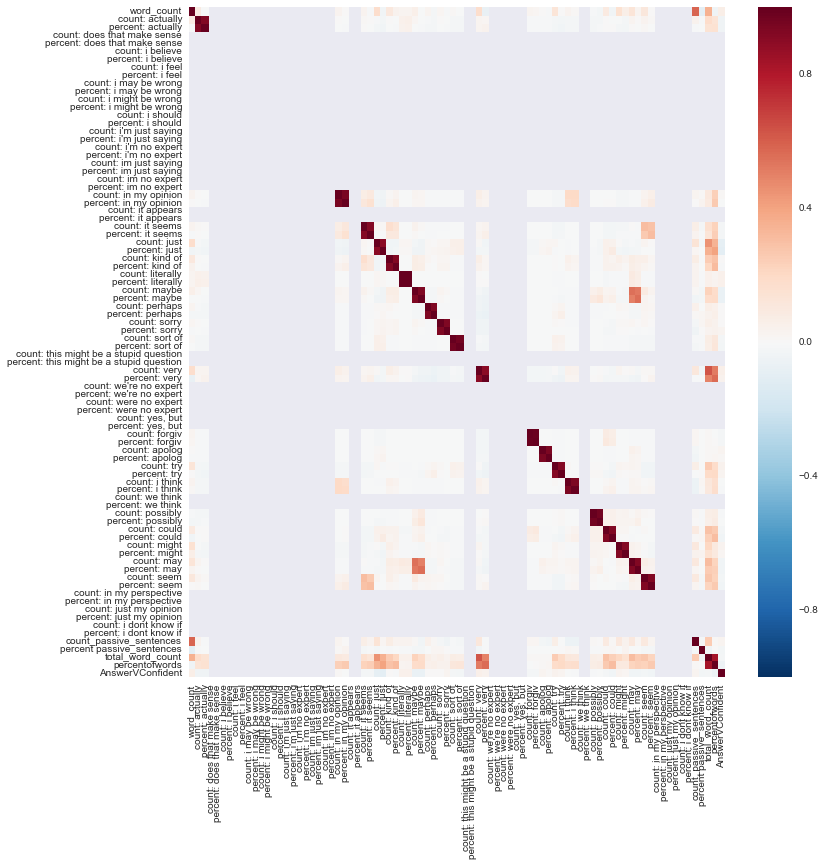

In [335]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(wdfnew.corr())

## Create X and Y

In [389]:
X = wdfnew.iloc[:, 5:-1]

In [390]:
X.drop('writergender_firstname', axis=1, inplace=True)

In [391]:
X.head()

,count: actually,percent: actually,count: does that make sense,percent: does that make sense,count: i believe,percent: i believe,count: i feel,percent: i feel,count: i may be wrong,percent: i may be wrong,...,count: in my perspective,percent: in my perspective,count: just my opinion,percent: just my opinion,count: i dont know if,percent: i dont know if,count_passive_sentences,percent passive_sentences,total_word_count,percentofwords
0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,2,0,0,0.000000
1,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,1,0,2,3.278689
2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,2,0,2,3.278689
3,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0,2,3.571429
4,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,1,0,0,0.000000


In [392]:
y = wdfnew.iloc[:, -1]

In [393]:
#evaluate base case (how accurate it would be if you guessed the dominant class every time)

In [394]:
y.value_counts()

0.0    1083
1.0     285
Name: AnswerVConfident, dtype: int64

In [395]:
1083/(1083+283.)

0.7928257686676428

In [396]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

## Now Build That Model

In [397]:
#create a function that evaluates the model once built
def evaluate_model(model):
    #fit model on train
    model.fit(X_train, y_train)
    
    #predict High or Low based on test
    y_pred = model.predict(X_test)
    
    #create accuracy between the actual ratings and the predicted ratings
    a = accuracy_score(y_test, y_pred)
    
    #create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #create a classification report, which includes f1 score
    cr = classification_report(y_test, y_pred)
    
    #return elements built above
    print cm
    print cr
    
    return a

#create empty dictionary to input scores
all_models = {}

In [398]:
#import
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

#create decision tree model
dt = DecisionTreeClassifier()

#add model to dictionary
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[285  39]
 [ 65  22]]
             precision    recall  f1-score   support

        0.0       0.81      0.88      0.85       324
        1.0       0.36      0.25      0.30        87

avg / total       0.72      0.75      0.73       411



In [399]:
from sklearn.grid_search import GridSearchCV

In [400]:
#create dictionary of possible parmaters for the gridsearch
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}
#perform gridsearch
gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

#call function on best params and best score
all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.793128654971
[[322   2]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      0.99      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.78      0.69       411



In [401]:
#import
from sklearn.ensemble import BaggingClassifier

In [402]:
#bagging dictionary to be passed into gridsearch
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}

In [403]:
#run gridsearch on decision tree clasifier
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

#run model function 
all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': True}
0.792397660819
[[324   0]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.79      0.70       411



## Random Forest & Extra Trees w/ gridsearch

In [404]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#call RT class
rf = RandomForestClassifier()

#call function to run model
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}


#call ET class
et = ExtraTreesClassifier()

#call function to run model
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[304  20]
 [ 76  11]]
             precision    recall  f1-score   support

        0.0       0.80      0.94      0.86       324
        1.0       0.35      0.13      0.19        87

avg / total       0.71      0.77      0.72       411

[[299  25]
 [ 68  19]]
             precision    recall  f1-score   support

        0.0       0.81      0.92      0.87       324
        1.0       0.43      0.22      0.29        87

avg / total       0.73      0.77      0.74       411



In [405]:
#define options for gridsearch
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}

#run gridsearch
gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

#call function to run model and find score
all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'gini', 'max_depth': 3, 'class_weight': None}
0.793128654971
[[324   0]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.79      0.70       411



In [406]:
#run gridsearch on RT
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gset.fit(X, y)
print gset.best_params_
print gset.best_score_

#call function to run model and find score
all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'gini', 'max_depth': 3, 'class_weight': None}
0.792397660819
[[324   0]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.79      0.70       411



,score
model,
gsrf,0.788321
gsbaggingdt,0.788321
gset,0.788321
gsdt,0.783455
et,0.773723
rf,0.766423
dt,0.746959


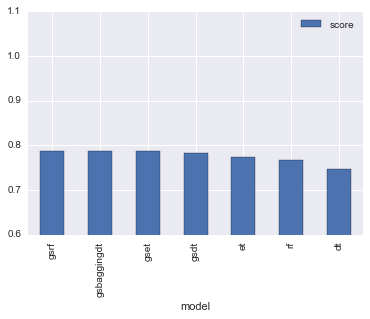

In [407]:
#return compilation of all scores for models run & graoh
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

First time around: Only one model out performs guessing (by .1%) and that is the grid search decision trees
Next time running models: none were better than guessing though got close

## Next Steps:

-Work on building a cluster model with k means to see if that yields more accuracy

-Possibly change binary to include slightly confident

-Work with including only percentages, only counts, or a combination of both to see which models get better results

-Utilize this model as a feature for anther model:
- Model could take in gender and confidence level of blog writers
- Evaluate blog posts and comments on the internet 
- Would predict sentiment of comments for a writer with a certain confidence level and gender (possibly consider including industry


## Source information that backs up key word and phrase use

In [41]:
for x in Gmailplugin:
    print x['source']
    print

http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/

http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/

http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything

http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything

http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails

http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails

http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf

https://expresswriters.com/50-weak-words-and-phrases-to-cut-out-of-your-blogging/

http://blog.crew.co/5-weak-words-to-avoid/

http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInThe